<img src = "https://image.cnbcfm.com/api/v1/image/105284147-GettyImages-673632588.jpg?v=1557935343&w=1400&h=950" width = 400> </a>

<h1 align=center><font size = 5.5>Final Project: Interests in Data Science Topics & Crime Rate in San Francisco</font></h1>
<h1 align=center><font size = 4.5>Data Visualization with Python Course by IBM/Coursera</font></h1>

__Assignment description:__ Generate two visualization plots. The first one will be a plot to summarize the results of a survey that was conducted to gauge an audience interest in different data science topics. The second plot is a Choropleth map of the crime crate in San Francisco.

# Part 1: Create a plot to summarize the results of a survey that was conducted to gauge an audience interest in different data science topics

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import data into a df 
df = pd.read_csv("https://cocl.us/datascience_survey_data",
                skiprows = range(1),
                 header= None)
df.head()

,0,1,2,3
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [3]:
# set..........
headers = ["Topic", "Very interested", "Somewhat interested", "Not interested"]
df.columns = headers
df.set_index("Topic", inplace= True)
df.index.name = None
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Big Data (Spark / Hadoop) to Machine Learning
Data columns (total 3 columns):
Very interested        6 non-null int64
Somewhat interested    6 non-null int64
Not interested         6 non-null int64
dtypes: int64(3)
memory usage: 192.0+ bytes


In [5]:
# Sort the dataframe in descending order of Very interested.
df.sort_values(by=['Very interested'], ascending = False, inplace=True)
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [6]:
# Convert the numbers into percentages of the total number of respondents.
# Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
df_percent = (df*100/2233).round(2)
df_percent.head(6)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


In [7]:
df_percent.columns = list(map(str, df.columns))
all(isinstance(column, str) for column in df_percent.columns)

True

In [8]:
df_percent[df.columns[0]]

Data Analysis / Statistics    75.59
Machine Learning              72.95
Data Visualization            60.01
Big Data (Spark / Hadoop)     59.65
Deep Learning                 56.56
Data Journalism               19.21
Name: Very interested, dtype: float64

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels0 = list(df.columns)
labels
men_means = [20, 34, 30]
women_means = [25, 32, 34]

x = np.arange(len(labels0))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects01 = ax.bar(x - width/2, men_means, width, label='Men')
rects02 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects01)
autolabel(rects02)

fig.tight_layout()

plt.show()

NameError: name 'labels' is not defined

In [ ]:
### create labels & label location
labels = list(df.index)
labels

In [ ]:
df_percent

In [ ]:
# Make some fake data:
n_series = 3
n_observations = 5
x = np.arange(n_observations)
data = np.random.random((n_observations,n_series))
data

In [ ]:
# Make some fake data:
n_series = 3
n_observations = 5
x = np.arange(n_observations)
data = np.random.random((n_observations,n_series))


# Plotting:

fig, ax = plt.subplots(figsize=(20,5))

# Determine bar widths
width_cluster = 0.7
width_bar = width_cluster/n_series

for n in range(n_series):
    x_positions = x+(width_bar*n)-width_cluster/2
    ax.bar(x_positions, df_percent[:,n], width_bar, align='edge')

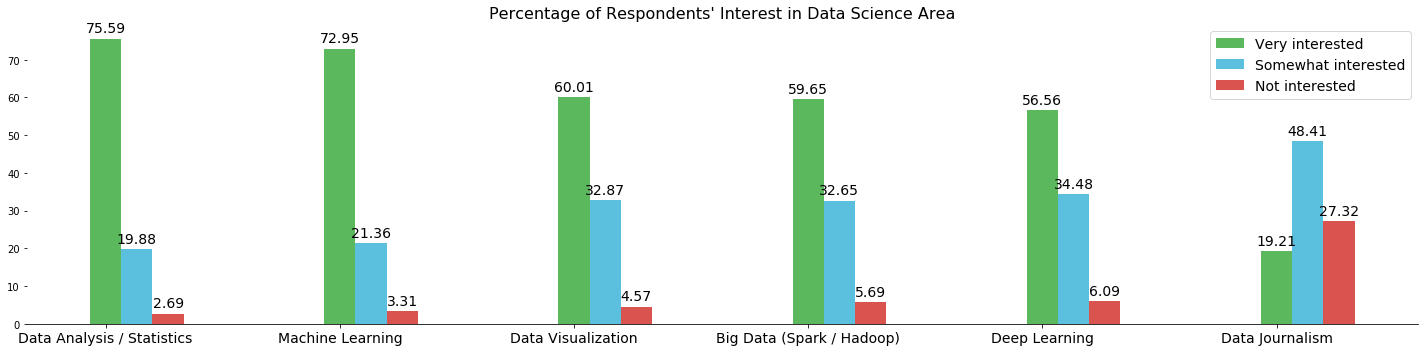

In [10]:
# create a vertical bar chart

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


### create labels & label location
labels = list(df_percent.index)
labels

### use a figure size of (20, 8)
x = np.arange(len(labels))  # the label locations
width = .8

fig, ax = plt.subplots(figsize=(20,5))

n=3
width_cluster = 0.8
width_bar = width_cluster/n

for n in range(n):
    x_positions = x+(width_bar*n)-width_cluster/2


### use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,    
rects1 = ax.bar(x_positions - width/6, 
                df_percent[df_percent.columns[0]],
                width/n/3,
                label=df_percent.columns[0], 
                align='center',
                color='#5cb85c')


rects2 = ax.bar(x_positions,
                df_percent[df_percent.columns[1]],
                width/n/3,
                label=df_percent.columns[1],
                align='center',
                color='#5bc0de')

rects3 = ax.bar(x_positions + width/6, 
                df_percent[df_percent.columns[2]], 
                width/n/3, 
                label=df_percent.columns[2],
                align='center',
                color='#d9534f')


### use font size 16 for the title
ax.set_title('Percentage of Respondents\' Interest in Data Science Area', fontsize=16)

### use font size 14 for the bar labels
ax.set_xticklabels(labels, fontsize=14)

### use font size 14 for the legend
ax.legend(fontsize=14)

### ### use font size 14 for the percentange
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize = 14)
        
        
       
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

### remove the left, top, and right borders
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')


# Align bar labels with repsective bars
ax.set_xticks(range(len(df_percent)))


fig.tight_layout()

plt.show()





# Part 2: Create a Choropleth map of the crime crate in San Francisco

In [11]:
# Assignment 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# upload data to data frame
csv_url2 = "https://cocl.us/sanfran_crime_dataset"
df2 = pd.read_csv(csv_url2)
df2_dist2 = df2["PdDistrict"].value_counts().to_frame()
df2_dist2.rename(columns={'PdDistrict':'Count'}, inplace=True)
df2_dist2['District'] = df2_dist2.index.values
df2_dist2

,Count,District
SOUTHERN,28445,SOUTHERN
NORTHERN,20100,NORTHERN
MISSION,19503,MISSION
CENTRAL,17666,CENTRAL
BAYVIEW,14303,BAYVIEW
INGLESIDE,11594,INGLESIDE
TARAVAL,11325,TARAVAL
TENDERLOIN,9942,TENDERLOIN
RICHMOND,8922,RICHMOND
PARK,8699,PARK


In [12]:
# import Folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [13]:
# download SF geo.json file
import pandas as pd
import folium
import urllib.request, json 

with urllib.request.urlopen("https://cocl.us/sanfran_geojson") as url:
    sf_geo = json.loads(url.read().decode())
    print(sf_geo)

{'type': 'FeatureCollection', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'OBJECTID': 1, 'DISTRICT': 'CENTRAL', 'COMPANY': 'A'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-122.40532134644249, 37.806867516866724], [-122.40440122046421, 37.80885380837723], [-122.40438743872008, 37.80886519707406], [-122.40436730880846, 37.808872966044206], [-122.40434376667437, 37.808869624109605], [-122.40431429421082, 37.80881799170733], [-122.40394067997407, 37.80876198999871], [-122.40392016838871, 37.808754877186864], [-122.40390555965932, 37.808734021463344], [-122.40390814512642, 37.80871288836611], [-122.40471878715235, 37.80696905969842], [-122.4039597318324, 37.80657809724], [-122.4027673862454, 37.80801170771318], [-122.40274578869823, 37.80802322234157], [-122.40271771623641, 37.80802615647638], [-122.40269398350013, 37.80801537335998], [-122.40235483855216, 37.8078397060222], [-122.40234023023558, 3

In [14]:
# create a plain sf map
# you use a zoom level of 12
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)
sf_map

In [15]:
# create map
# you use fill_color = 'YlOrRd',
# you define fill_opacity = 0.7,
# you define line_opacity=0.2
# you define a legend and use the default threshold scale

import pandas as pd


sf_map.choropleth(
    geo_data=sf_geo,
    data=df2_dist2,
    columns=['District','Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime Rate in San Francisco")

    
# display map
sf_map